# Classifying Partial Differential Equations

Linear or non-linear? A PDE is called linear (sufficient condition) if the unknown function and its derivative appear to the power of one. Otherwise, non-linear. Let us look at some examples

\begin{align}
\dfrac{\partial u}{\partial t} + t\dfrac{\partial u}{\partial x} = 0
\end{align}

This PDE is linear. How about this one?

\begin{align}
\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2} = 0
\end{align}

This PDE is also linear. Let us look at the last example,

\begin{align}
\dfrac{\partial u}{\partial t} + \dfrac{\partial^3 u}{\partial x^3}  = 6u\dfrac{\partial u}{\partial x}
\end{align}

This last one is non-linear. This is because on the right hand side, we see that the product of $u$ and its partial derivatives makes it second order.

Now we take one step further. Let us assume we have a linear PDE. Even more, the linear PDE is second order. In general,

\begin{align}
A\dfrac{\partial^2 u}{\partial x^2} + B\dfrac{\partial^2 u}{\partial x\partial y} + C\dfrac{\partial^2 u}{\partial y^2} + D = 0
\end{align}

where $A(x,y), B(x,y), C(x,y)$ are functions of $x,y$. $D$ is linear function of $x,y,u,u_x, u_y$. Under these assumptions, if the identity

\begin{align}
B^2 - 4AC
\end{align}

is less than zeo, then the PDE is called elliptic. If it is stricly zero, then the PDE is parabolic. And lastly if it's larger than zero, then it's hyperbolic (this has nothing to do with conic geometry).

# Boundary Conditions & Solution Methods

Recall that we have two primary kinds of boundary conditions

1. Dirichlet, in which the value of functions given
2. Neumann, in which the value of derivatives given

Then, we have three approaches

1. Finite Difference Method (including explicit and implicit)
2. Finite Volume Method (control volume)
3. Finite Element Method

# Finite Difference & Parabolic Equations

## Finite Difference Approximations to Derivatives

We'll find finite difference approximations to partial derivatives with a view to replacing the full partial differential equation by a difference representation which then allows a numerical approach to be pursued. The result is that the partial derivatives are replaced by relationships between the function values at nodal points of some grid system. In order to perform this discretisation, expressions for such terms as

\begin{align}
\dfrac{\partial u}{\partial x}\quad\text{and}\quad\dfrac{\partial^2\phi}{\partial^2 x}
\end{align}

at typical grid points are required in terms of the $\phi$ values at neighbouring grid points.

Consider a mesh with a constant increment $h$ in the $x$ direction and constant increment $k$ in the $y$ direction. Using Taylor series in one variable, for example, $x$, gives

\begin{align}
\phi_E = \phi_P + h\left(\dfrac{\partial\phi}{\partial x}\right)_P + \dfrac{h^2}{2!}\left(\dfrac{\partial^2\phi}{\partial x^2}\right)_P + O(h^2)\\
\phi_W = \phi_P - h\left(\dfrac{\partial\phi}{\partial x}\right)_P + \dfrac{h^2}{2!}\left(\dfrac{\partial^2\phi}{\partial x^2}\right)_P + O(h^2)\\
\end{align}

Then, 

\begin{align}
\left(\dfrac{\partial \phi}{\partial x}\right)_P = \dfrac{\phi_E-\phi_P}{h}+O(h)
\end{align}

What does this mean? It basically gives us the *forward* difference approximation. Why forward? I'm glad you asked. Notice that we're having $\phi_E-\phi_P$, this means given $\phi_P$ which is the place we're standing, and the partial derivative along the $x$ axis, we'll be able to calculate $\phi_E$, which is moving forward (the positive direction) of the $x$ axis. Similarly, had we used the second Taylor expansion, we would have obtained

\begin{align}
\left(\dfrac{\partial \phi}{\partial x}\right)_P = \dfrac{\phi_P-\phi_W}{h}+O(h)
\end{align}

Even better, we could sum up the two equations. All even terms cancelled, which gives

\begin{align}
\phi_E-\phi_W = 2h\left(\dfrac{\partial\phi}{\partial x}\right)_P + 2\dfrac{h^3}{3!}\left(\dfrac{\partial^3\phi}{\partial x^3}\right)_P + O(h^5)
\end{align}

or compactly

\begin{align}
\left(\dfrac{\partial\phi}{\partial x}\right)_P = \dfrac{\phi_E-\phi_W}{2h}+O(h^2)
\end{align}

Notice that the error scales as $h^2$, instead of $h$ as in the forward/backward difference. Now, the same approach can be taken for second order partial derivatives.

\begin{align}
\left(\dfrac{\partial^2\phi}{\partial x^2}\right)_P= \dfrac{\phi_E+\phi_W-2\phi_P}{h^2}+O(h^2)
\end{align}

Now translating into the language of step. It's relatively straightforward. Suppose you're at step $i,j$. The partial derivatives (1st and 2nd order) are

\begin{align}
\left(\phi_x\right)_{i,j} = \dfrac{\phi_{i+1,j}-\phi_{i-1,j}}{2h}+O(h^2)\\
\left(\phi^2_x\right)_{i,j} = \dfrac{\phi_{i+1,j}+\phi_{i-1,j}-2\phi_{i,j}}{h^2}+O(h^2)
\end{align}

One should easily see how one particularly natural problem arises. Inside the mesh, we can approximate the derivatives to $\mathcal{O}(h^2)$. At the boundaries, however, things get complicated. How would we determine $E'$, if $P$ (the place we're standing on) is the edge. There's no edge of the edge. 

For Dirichlet boundary conditions, $\phi$ would be clarified at boundaries, so we're happy in such cases. For Neumann boundary conditions, the normal derivatives, not the values, are given. 

The finite difference forms arising in dealing with derivative boundary conductions in such cases are considered. One strategy is, if we're not allowed to move forward, let's move backward. Expanding the Taylor series backward, we have 

\begin{align}
\phi_W = 

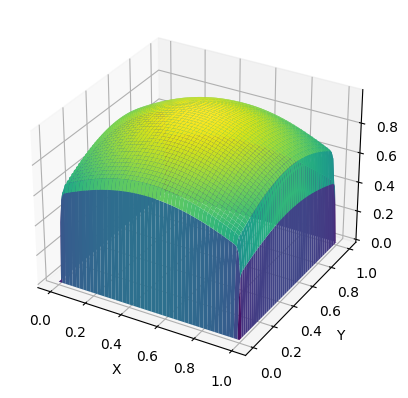

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
L = 1.0  # Length of the square domain
T = 1.0  # Total time
N = 100  # Number of grid points in each dimension
h = L / (N - 1)  # Grid spacing
k = h / 2.0  # Time step size
c = 1.0  # Wave speed

# Initialize grid
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Initial conditions
u = np.exp(-(X - L / 2.0) ** 2 - (Y - L / 2.0) ** 2)
u_old = u.copy()

# Time-stepping loop
t = 0.0
while t < T:
    # Update u using the Leap Frog scheme
    u_new = u_old + k * c ** 2 * (
            np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
            np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) -
            4 * u
    )

    # Set boundary conditions to zero
    u_new[0, :] = 0
    u_new[-1, :] = 0
    u_new[:, 0] = 0
    u_new[:, -1] = 0

    # Update time and swap variables for the next iteration
    t += k
    u_old = u.copy()
    u = u_new

# Plot the final solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1  # Length of the domain
T = 1  # Total simulation time
Nx = 100  # Number of grid points in x-direction
Ny = 100  # Number of grid points in y-direction
dx = L / (Nx - 1)  # Grid spacing in x-direction
dy = L / (Ny - 1)  # Grid spacing in y-direction
dt = 0.001  # Time step size
c = 1  # Wave speed

# Initialize arrays
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)
u = np.zeros((Nx, Ny))
u_prev = np.zeros((Nx, Ny))

# Initial condition
u_prev[Nx // 2, Ny // 2] = 1  # Gaussian pulse at the center

# Main loop
t = 0
while t < T:
    # Update equation using FTCS scheme
    u[1:-1, 1:-1] = u_prev[1:-1, 1:-1] + (c * dt / dx) ** 2 * (
        u_prev[2:, 1:-1] + u_prev[:-2, 1:-1] - 2 * u_prev[1:-1, 1:-1]
    ) + (c * dt / dy) ** 2 * (
        u_prev[1:-1, 2:] + u_prev[1:-1, :-2] - 2 * u_prev[1:-1, 1:-1]
    )
    
    # Boundary conditions (reflective boundaries)
    u[:, 0] = u[:, 1]
    u[:, -1] = u[:, -2]
    u[0, :] = u[1, :]
    u[-1, :] = u[-2, :]

    # Update previous solution
    u_prev = u.copy()

    # Increment time
    t += dt

# Plot the final solution
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np

# 2D wave equation -- Leap Frog scheme

\begin{align}
\dfrac{\partial^2 u}{\partial t^2} = v^2\left(\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2}\right)
\end{align}

Initial conditions: $u(x,y,0)=f(x,y)$. $u_t(x,y,0)=g(x,y)$.

Boundary conditions:
\begin{align}
u(a_1, y, t)=h_1(y, t)\\
u(a_2, y, t)=h_2(y,t)\\
u(x, b_1, t)=h_3(x, t)\\
u(x, b_2, t)=h_4(x, t)
\end{align}

In [26]:
# For simplicity, a1 = b1 = 0; a2 = b2 = 1

a1, b1 = 0, 0
a2, b2 = 1, 1

dx = 0.01
dt = 0.001
dy = dx

v = 0.1 # velocity
r = v*dt/dx

T = 10.0
x_range = np.arange(a1, a2, dx)
y_range = np.arange(b1, b2, dy)
X, Y = np.meshgrid(x_range, y_range)
t_range = np.arange(0, T, dt)

Nx, Ny, Nt = len(x_range), len(y_range), len(t_range)
u = np.zeros((Nx, Ny, Nt))

In [11]:
# initial conditions
def f(x, y, a=1):
    return np.sin(2*np.pi*x/a)*np.sin(2*np.pi*y/a)

def g(x, y):
    return 0

def h1(y, t):
    return 0

def h2(y, t):
    return 0

def h3(x, t):
    return 0

def h4(x, t):
    return 0

In [39]:
Nspace = Nx

# initial condition
for i in range(Nspace):
    for j in range(Nspace):
        u[i, j, 0] = f(x_range[i], y_range[i])

# boundary condition
for n in range(Ntime):
    for i in range(Nspace): #xrange
        for j in range(Nspace): #range
            u[0, j, n] = h1(y_range[i], t_range[n])
            u[Nspace-1, j, n] = h2(y_range[j], t_range[n])
            u[i, 0, n] = h3(x_range[i], t_range[n])
            u[i, Nspace-1, n] = h4(x_range[i], t_range[n])

# for n = 1
for i in range(1, Nspace-1):
    for j in range(1, Nspace-1):
        u[i, j, 1] = u[i, j, 0] + dt*g(x_range[i], y_range[j]) \
                        + 0.5*r**2*(u[i+1, j, 0] - 2*u[i, j, 0]+ u[i-1, j, 0]) \
                        + 0.5*r**2*(u[i, j+1, 0] - 2*u[i, j, 0]+ u[i, j-1, 0]) \
                
for n in range(1, Nspace):
    for i in range(1, Nspace-1):
        for j in range(1, Nspace-1):
            u[i, j,n+1] = 2*u[i, j, n] - u[i, j, n-1] \
                + r**2*(u[i+1, j, n]-2*u[i,j,n]+u[i-1, j, n]) \
                + r**2*(u[i, j+1, n]-2*u[i, j, n]+u[i, j-1, n])

u

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.00394265, 0.00394284, 0.00394343, ..., 0.        ,
         0.        , 0.        ],
        [0.00394265, 0.00394304, 0.00394421, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00394265, 0.00394304, 0.00394421, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [1]:
# Homework: CHANGE THE BOUNDARY TO A DISK
# COMPLICATION: 
# IN ADDITION, TRY LAPLACIAN IN POLAR COORDINATE.

# FDM